In [1]:
import skimage
print('skimage', skimage.__version__)

skimage 0.13.1


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

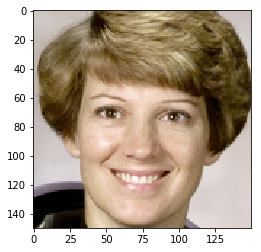

In [3]:
from skimage import data, img_as_float

astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]
plt.imshow(astro);

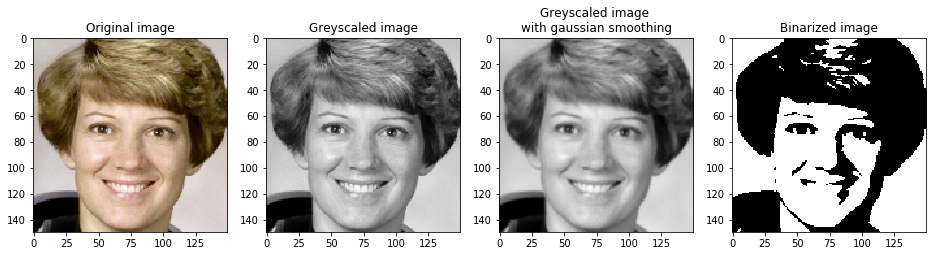

In [4]:
from skimage.filters import threshold_otsu, threshold_local, gaussian
from skimage import color

plt.figure(figsize=(16, 6))

plt.subplot(141)
plt.title("Original image")
plt.imshow(astro)

astro_grey = color.rgb2grey(astro)

plt.subplot(142)
plt.title("Greyscaled image")
plt.imshow(astro_grey, cmap='gray')

# We added gaussian smoothing in order to reduce
# number of very small regions
astro_grey = gaussian(astro_grey, sigma=0.6)

plt.subplot(143)
plt.title("Greyscaled image \nwith gaussian smoothing")
plt.imshow(astro_grey, cmap='gray')

# Increase threshold in order to add more
# details to the binarized image
thresh = threshold_otsu(astro_grey) + 0.1
binary_astro = astro_grey < thresh

plt.subplot(144)
plt.title("Binarized image")
plt.imshow(astro_grey > thresh, cmap='gray');

Number of data points: 11,931


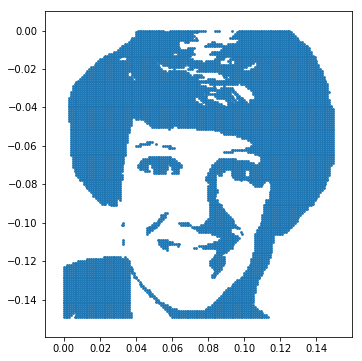

In [5]:
import numpy as np

# Convert each black pixel to a separate data point
# We will use these data points in order to learn
# topological structure of the image
data = []
for (x, y), value in np.ndenumerate(binary_astro):
    if value == 1:
        data.append([y, -x])

# Scaling factor allows us to reduce distance between data points
scale_factor = 0.001   
data = scale_factor * np.array(data)
x_max, y_max = binary_astro.shape
print("Number of data points: {:,}".format(len(data)))

plt.figure(figsize=(5.5, 6))
plt.scatter(*np.array(data).T, s=3);


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] train_end_signal = None
[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 2400
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.005
[OPTION] step = 0.2


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #1, train err: 0.008212, time: 1 sec



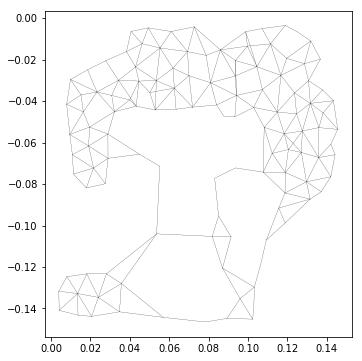


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #2, train err: 0.003526, time: 2 sec



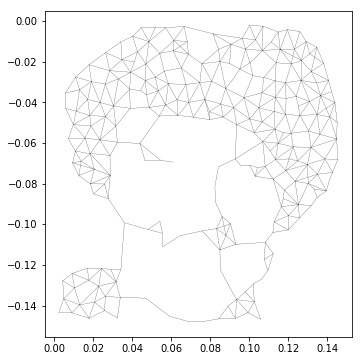


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #3, train err: 0.002724, time: 3 sec



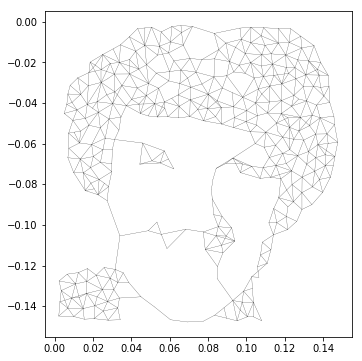


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #4, train err: 0.002291, time: 4 sec



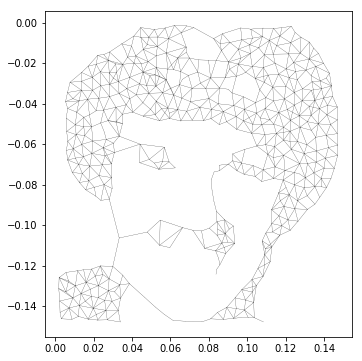


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #5, train err: 0.002027, time: 7 sec



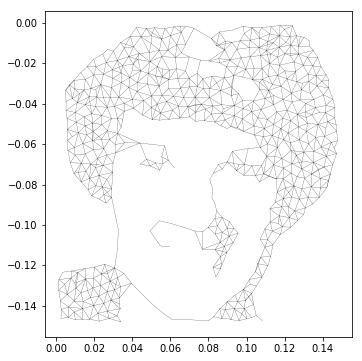


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #6, train err: 0.001829, time: 8 sec



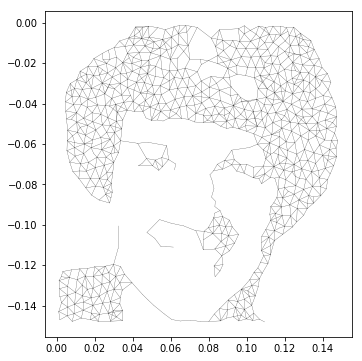


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #7, train err: 0.001686, time: 7 sec



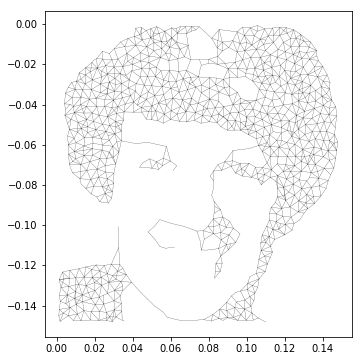


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #8, train err: 0.001571, time: 8 sec



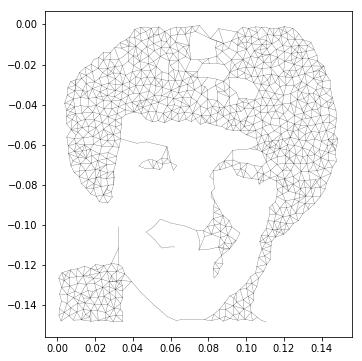


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #9, train err: 0.001474, time: 10 sec



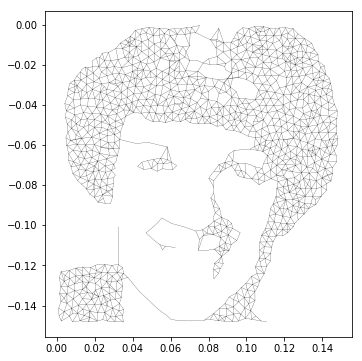


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #10, train err: 0.001393, time: 11 sec



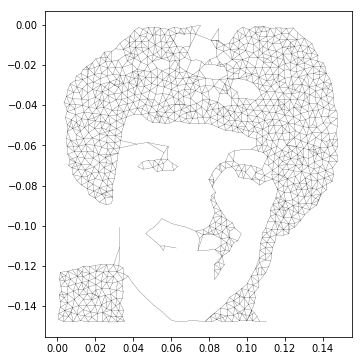


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #11, train err: 0.001323, time: 12 sec



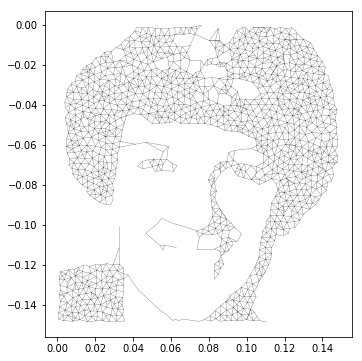


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #12, train err: 0.001265, time: 13 sec



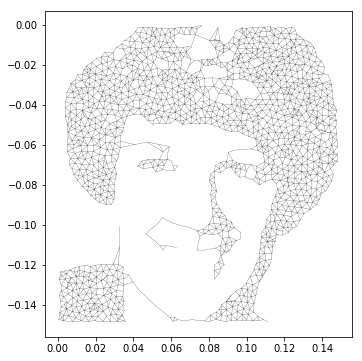


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #13, train err: 0.001209, time: 14 sec



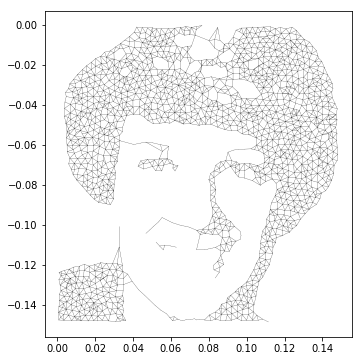


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #14, train err: 0.001160, time: 16 sec



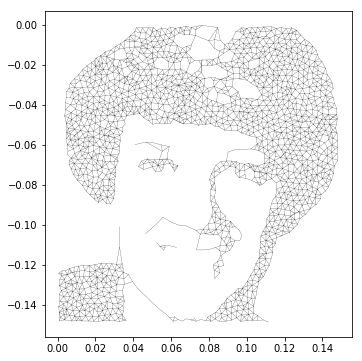


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #15, train err: 0.001119, time: 16 sec



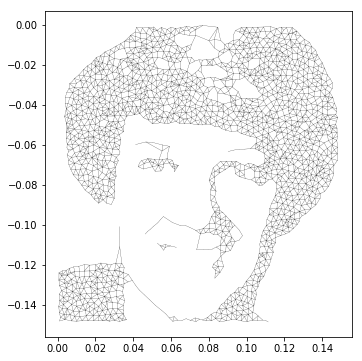


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #16, train err: 0.001082, time: 19 sec



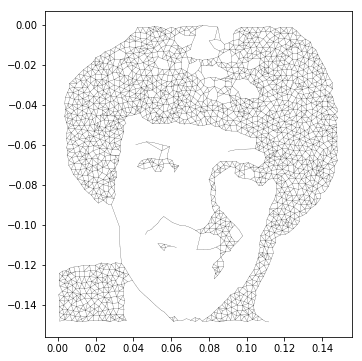


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #17, train err: 0.001048, time: 19 sec



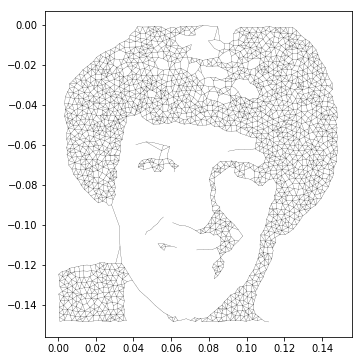


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #18, train err: 0.001016, time: 20 sec



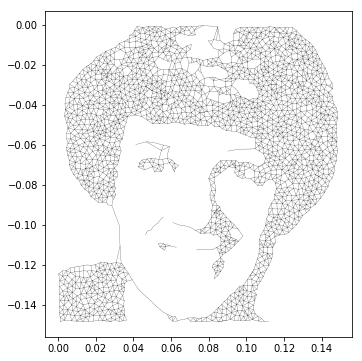


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #19, train err: 0.000988, time: 22 sec



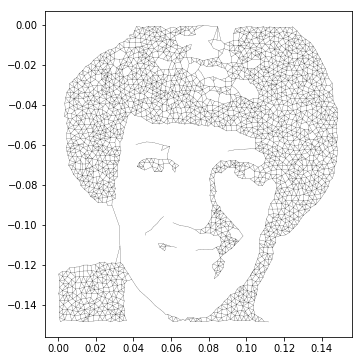


Start training

[TRAINING DATA] shapes: (11931, 2)
[TRAINING] Total epochs: 1

epoch #20, train err: 0.000962, time: 24 sec



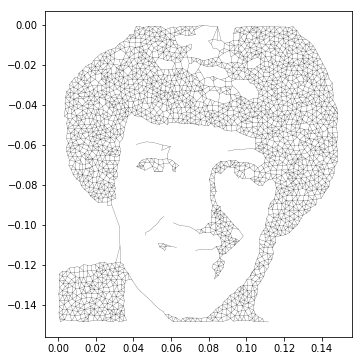

In [8]:
from neupy import algorithms, environment
    
environment.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=True,
    
    step=0.2,
    neighbour_step=0.005,
    
    max_edge_age=50,
    max_nodes=2400,
    
    n_iter_before_neuron_added=100,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.01,
)

for _ in range(20):
    gng.train(data, summary='inline', epochs=1)
    
    # Plot images after each iteration in order to see training progress
    plt.figure(figsize=(5.5, 6))
    
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')
        plt.setp(line, linewidth=0.2, color='black')

    plt.show()

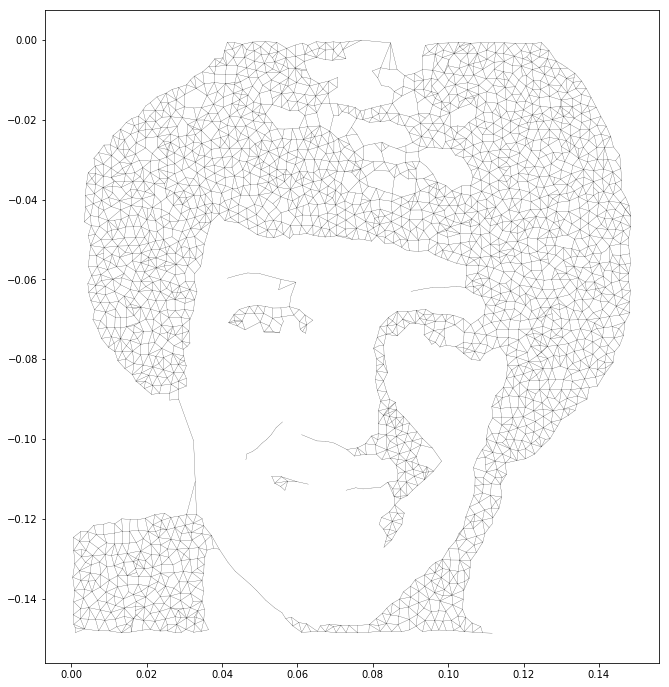

In [9]:
plt.figure(figsize=(11, 12))

for node_1, node_2 in gng.graph.edges:
    weights = np.concatenate([node_1.weight, node_2.weight])
    line, = plt.plot(*weights.T, color='black')
    plt.setp(line, linewidth=0.2, color='black')

plt.show()